# Árvores de Decisão: Regressão

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score

# Módulo de Análise Exploratória
import aed

## Importação da base de dados

In [2]:
df_rh = pd.read_csv('base_funcionarios.csv', sep=';')
df_rh.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
0,5517.4,3,3
1,6399.9,4,6
2,6206.7,6,3
3,6060.6,4,5
4,6122.7,2,9


## Preparação dos Dados

### Missing Values

In [3]:
df_rh.isnull().sum()

Salario               0
Anos_Educ_Superior    0
Tempo_Empresa         0
dtype: int64

### Duplicações

In [4]:
df_rh.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


## Análise Exploratória dos Dados

### Dispersão por Classe

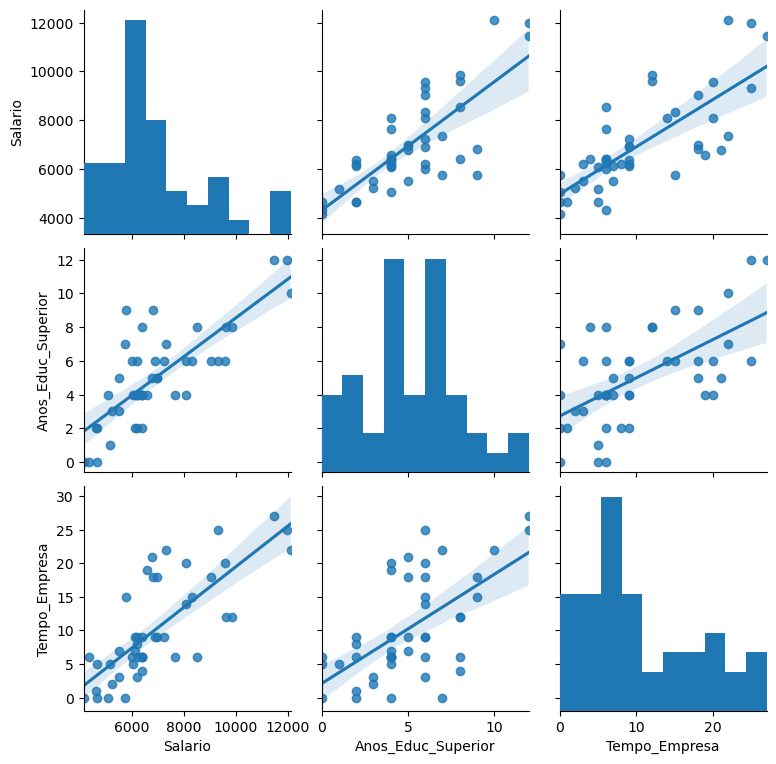

In [6]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df_rh, kind='reg');

### Relatórios Pandas Profiling e SweetViz

In [7]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df_rh,
                                               target_feat='Salario')

:TARGET::                          |█████▎               | [ 25%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão
Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de *Machine Learning*.

### Definição do *Target* e das *Features*

In [8]:
# Target (variável resposta)
y = df_rh['Salario']

# Features (variáveis explicativas)
x = df_rh.drop('Salario', axis = 1)

### Treinamento da Árvore de Decisão

In [9]:
modelo_salario = DecisionTreeRegressor(max_depth=2, 
                                       random_state=42)
modelo_salario.fit(x, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

### Avaliação do modelo treinado

#### Interpretação do Modelo

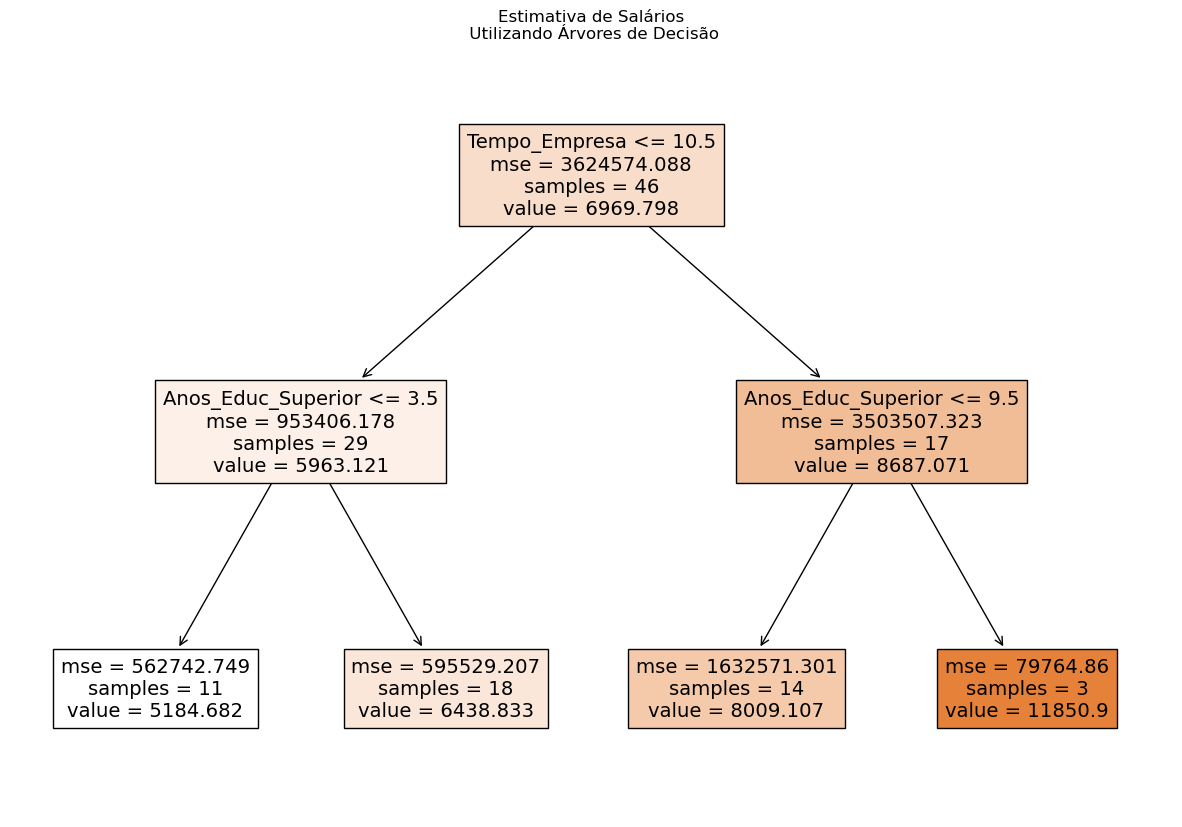

In [11]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_salario,
               feature_names=features,
               filled=True);
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão");

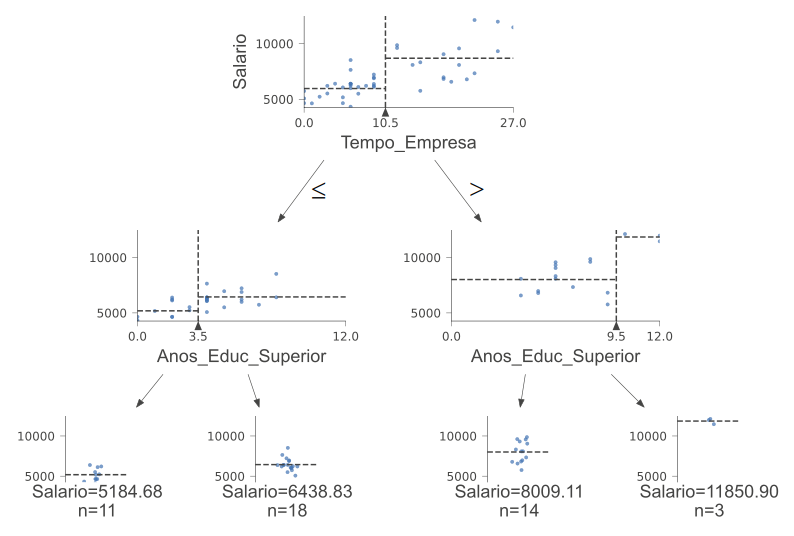

In [12]:
viz = dtreeviz(tree_model=modelo_salario, 
               x_data=x, y_data=y, 
               target_name='Salario',
               feature_names=features,
               scale=2.0)
viz

#### Desempenho do Modelo

In [13]:
# Cálculo do desempenho do modelo: R²
r2_score(y, modelo_salario.predict(x))

0.7600618314992317